# Part A - Regression - Linear Regression Project & Classification Tree Homework

## Requirements: Python Package Dependencies

- autopep8
- pandas
- scikit-learn

## Dataset

We will be using data collected from
[Enigma](https://aws.amazon.com/marketplace/pp/prodview-t2v5nvogqosyq#offers)
covering Covid-19 data in U.S Counties, in YYYY/MM/DD format,
from 2020/03/09 to 2020/09/30

**Below are some links and resources on information of our dataset**:

- [About: A public data lake for COVID-19 research and development](https://aws.amazon.com/covid-19-data-lake/)
- [AWS Big Data Blog: A public data lake for analysis of COVID-19 data](https://aws.amazon.com/blogs/big-data/a-public-data-lake-for-analysis-of-covid-19-data/)
- [COVID-19 S3 data browser](https://covid19-lake.s3.us-east-2.amazonaws.com/databrowser.html)
- [More about the company Enigma](https://enigma.com/)


In [23]:
import pandas as pd
import os

# Path to the folder with the dataset
data_folder_path: str = os.path.normpath(
    r".\data\part_a\covid19-lake\enigma-aggregation\csv\us_counties"
)

data_file_name: str = "enigma_covid_19_us_counties.csv"

# Path to the CSV file with the dataset
data_file_path: str = os.path.join(
    data_folder_path,
    data_file_name
)

# Read the CSV file into a DataFrame
df = pd.read_csv(data_file_path)

df.head()

,state_fips,state_name,county_fips,county_name,area_name,lat,long,date,cases,deaths
0,1,Alabama,1001.0,Autauga County,NaN,32.532237,-86.646439,2020-03-24,1,0
1,1,Alabama,1001.0,Autauga County,NaN,32.532237,-86.646439,2020-03-25,4,0
2,1,Alabama,1001.0,Autauga County,NaN,32.532237,-86.646439,2020-03-26,6,0
3,1,Alabama,1001.0,Autauga County,NaN,32.532237,-86.646439,2020-03-27,6,0
4,1,Alabama,1001.0,Autauga County,NaN,32.532237,-86.646439,2020-03-28,6,0


Let's remove the `area_name` column for it mostly doesn't contain any useful
data and clean up records does not have all keys populated.


In [24]:
# Name of the new CSV file with the cleaned data
clean_dataset_file_name: str = "enigma_covid_19_us_counties_cleaned.csv"
clean_dataset_file_path: str = os.path.join(
    data_folder_path,
    clean_dataset_file_name
)

# Remove the column "area_name" for its the majority of values are missing
df = df.drop('area_name', axis=1)  # axis=1 means column axis

# Drop any rows with missing values
df = df.dropna()

# Save the cleaned DataFrame to a new CSV file as a "checkpoint"
df.to_csv(
    clean_dataset_file_path,
    index=False
)

# Print the first 5 rows of the cleaned DataFrame
df.head()

,state_fips,state_name,county_fips,county_name,lat,long,date,cases,deaths
0,1,Alabama,1001.0,Autauga County,32.532237,-86.646439,2020-03-24,1,0
1,1,Alabama,1001.0,Autauga County,32.532237,-86.646439,2020-03-25,4,0
2,1,Alabama,1001.0,Autauga County,32.532237,-86.646439,2020-03-26,6,0
3,1,Alabama,1001.0,Autauga County,32.532237,-86.646439,2020-03-27,6,0
4,1,Alabama,1001.0,Autauga County,32.532237,-86.646439,2020-03-28,6,0


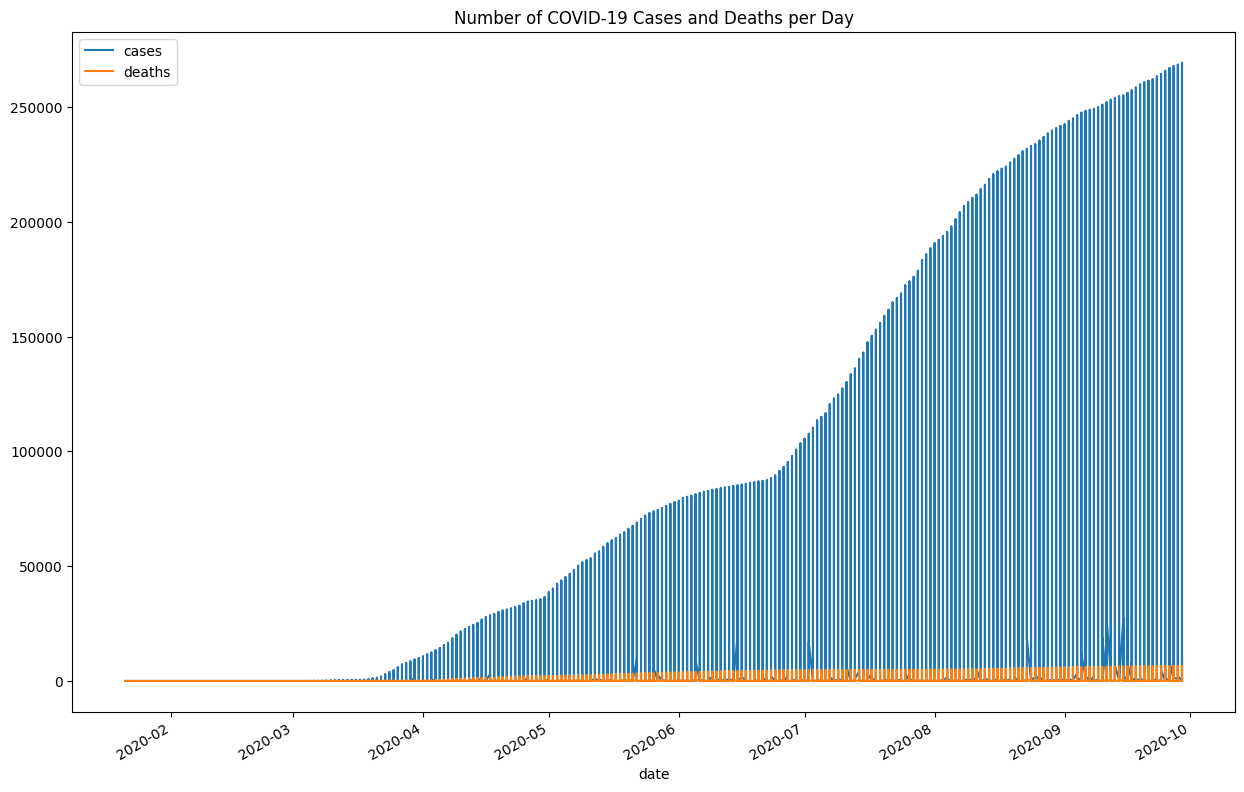

In [25]:
# Grab the column "date" and convert it to a datetime object (if it is not already)
df['date'] = pd.to_datetime(df['date'])

# Create a plot of the number of cases and deaths per day
df.plot(
    x='date',
    y=['cases', 'deaths'],
    figsize=(15, 10),
    title="Number of COVID-19 Cases and Deaths per Day"
)

# show the plot
plt.show()